# Machine Learning Project

Authors:
Jingyan Ling & Yuchen Wang


In [1]:
#Apply Boosting/ Forward statge- wise tranning
from autograd import grad 
from autograd import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import csv
from tkinter import Tk, Label, Button, Entry, Frame, TOP, LEFT, RIGHT, StringVar


datapath = '/home/jingyan/Documents/eecs475/final_project/datasets/'
csvfile = datapath + 'header.csv'
fields = []
with open(csvfile) as file:
    reader = csv.reader(file,delimiter=',')
    for row in reader:
        fields.append(row)


csvname =datapath + 'dermatology.data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# # get input/output pairs

x = (data[:,:-1]).T
xx=x
y = data[:,-1]
y =np.reshape(y,(1,len(y)))-1


#boosting initial model
def boostmodel0(x,w):
    a=w
    return a
#boosting first round model
def boostmodel1(x,w):
    a=np.array([ws0]*y.size)+x*w
    return a

def boostmodel2(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x*w
    return a

def boostmodel3(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x[sig2]*ws2+x*w
    return a

def boostmodel4(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x[sig2]*ws2+x[sig3]*ws3+x*w
    return a

def softmax (w,x,model):
    
    cost = np.sum(np.log (1 + np.exp(-y*model(x,w))))
    return cost/float (np.size(y))

def gradient_descent(g,alpha,max_its,w,model,i):
    # compute gradient module using autograd
    gradient = grad(g)
    ww = w[i]
    xx=x[i-1]
#     if i > 0:
#         x = [xx[i-1]]
    
    # run the gradient descent loop
    weight_history = [ww] # weight history container
    cost_history = [g(ww,xx,model)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(ww,xx,model)

        # take gradient descent step
        ww = ww - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(ww)
        cost_history.append(g(ww,xx,model))
    return weight_history,cost_history

w=np.random.randn(x.shape[0]+1,1)**2

boostresult0=gradient_descent(softmax,3,250,w,boostmodel0,0)
#Assign tuned w0
ws0=boostresult0[0][-1][0]
plt.plot(boostresult0[-1])
plt.show()
print(boostresult0[-1][-5:])

FileNotFoundError: [Errno 2] No such file or directory: '/home/jingyan/Documents/eecs475/final_project/datasets/header.csv'

In [3]:
#Create list for second round boosting cost history and stroe weight
boostcost1=[]
boostweight1=[]
for k in range(1,x.shape[0]+1):
    boostresult1temp=gradient_descent(softmax,0.01,100,w,boostmodel1,k)
    boostcost1=np.append(boostcost1,boostresult1temp[-1][-1])
    boostweight1=np.append(boostweight1,boostresult1temp[0][-1]) 

print(boostcost1)    
sig1=np.argmin(boostcost1)

print(sig1)
ws1=boostweight1[sig1]

print('The first important attribute is',fields[0][sig1])

[0.21584086 0.21491893 0.21600349 0.21509692 0.21610598 0.21611037
 0.21610881 0.21610123 0.21610878 0.21610498 0.21606388 0.21610089
 0.21574969 0.21567585 0.21611049 0.21495948 0.21547324 0.21610859
 0.2154245  0.2161105  0.21610582 0.21609095 0.21603394 0.21611035
 0.21610466 0.21611045 0.21610814 0.21511697 0.21610067 0.21610614
 0.21610155 0.21527653 0.21608076 0.21491435]
33
The first important attribute is Age


In [4]:
#Create list for second round boosting cost history and stroe weight
boostcost2=[]
boostweight2=[]
for k in range(1,x.shape[0]+1):
    boostresult2temp=gradient_descent(softmax,0.1,50,w,boostmodel2,k)
    boostcost2=np.append(boostcost2,boostresult2temp[-1][-1])
    boostweight2=np.append(boostweight2,boostresult2temp[0][-1]) 
print(boostcost2)    
sig2=np.argmin(boostcost2)
if sig2 == sig1:
    sig2=np.argsort(boostcost2)[1]
print(sig2)
ws2=boostweight2[sig2]

print('The second important attribute is',fields[0][sig2])

[0.21493692 0.21491503 0.21508396 0.21494289 0.21610596 0.21611036
 0.21610881 0.21610123 0.21610875 0.21610492 0.21606388 0.21610089
 0.21574966 0.21503215 0.21611049 0.21491452 0.21492796 0.21509998
 0.21542449 0.2161105  0.21610568 0.21609095 0.21494147 0.21611035
 0.21610466 0.21611045 0.21610814 0.21491918 0.21610067 0.21610614
 0.21610155 0.21497092 0.21608076 0.21491435]
15
The second important attribute is exocytosis


In [5]:
#Create list for second round boosting cost history and stroe weight
boostcost3=[]
boostweight3=[]
for k in range(1,x.shape[0]+1):
    boostresult3temp=gradient_descent(softmax,0.1,50,w,boostmodel3,k)
    boostcost3=np.append(boostcost3,boostresult3temp[-1][-1])
    boostweight3=np.append(boostweight3,boostresult3temp[0][-1]) 
print(boostcost3)    
sig3=np.argmin(boostcost3)
if sig3==sig1:
    sig3=np.argsort(boostcost3)[1]
if sig3==sig2:
    sig3=np.argsort(boostcost3)[2]
print(sig3)
ws3=boostweight3[sig3]


print('The third important attribute is',fields[0][sig3])

[0.21491714 0.21491443 0.21508396 0.21491788 0.2149166  0.21611036
 0.21610881 0.21610123 0.21610875 0.21610492 0.21606388 0.21610089
 0.21574966 0.21503215 0.21611049 0.21491437 0.21491603 0.21509998
 0.21497738 0.2161105  0.21610568 0.21609095 0.21494147 0.21611035
 0.21610466 0.21611045 0.21610814 0.21491442 0.21610067 0.21610614
 0.21610155 0.21491521 0.21608076 0.21491435]
27
The third important attribute is spongiosis


In [6]:
#Create list for second round boosting cost history and stroe weight
boostcost4=[]
boostweight4=[]
for k in range(1,x.shape[0]+1):
    boostresult4temp=gradient_descent(softmax,0.1,50,w,boostmodel4,k)
    boostcost4=np.append(boostcost4,boostresult4temp[-1][-1])
    boostweight4=np.append(boostweight4,boostresult4temp[0][-1]) 
print(boostcost4)    
sig4=np.argmin(boostcost4)
if sig4==sig1:
    sig4=np.argsort(boostcost4)[2]
if sig4==sig2:
    sig4=np.argsort(boostcost4)[2]
if sig4==sig3:
    sig4=np.argsort(boostcost4)[3]
print(sig4)
ws4=boostweight4[sig4]


print('The forth important attribute is',fields[0][sig4])

[0.21491542 0.21491436 0.21493909 0.21491455 0.2149166  0.21611036
 0.21610881 0.21610123 0.21610875 0.21610492 0.21606388 0.21610089
 0.21574966 0.21503215 0.21536974 0.21491436 0.21491459 0.2149852
 0.21493842 0.2161105  0.21498039 0.21609095 0.21494147 0.21611035
 0.21610466 0.21611045 0.21610814 0.21491438 0.21610067 0.21610614
 0.21610155 0.2149144  0.21608076 0.21491435]
1
The forth important attribute is scaling


In [ ]:
##### def changeY (y,n,m):
    for i in range(np.size(y)):
        if(y[0][i] == n):
            y[0][i] = m
            
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
# multiclass softmaax regularized by thre summed length of all normal vectors

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w,x):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

def gradient_descent(g,alpha,max_its,w,model):
    # compute gradient module using autograd
    gradient = grad(g)
    if model=="boost":
        x=x_boost
        w=w2
    if model=="raw input":
        x=xx
        w=w1
        
    
    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w,x)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w,x)
        
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w,x))
    return weight_history,cost_history
#Return classification and the probability 
def fusion_rule(x,w):
    a=model(x,w)
    classif=np.argmax(a,axis=0)
    probability=[]
    for i in range(a.shape[1]):
        b=a[:,i]
        percentagetemp=b/np.linalg.norm(b)
        percentage=percentagetemp[classif[i]]
        probability=np.append(probability,percentage)
    return classif,probability



training model result is: [1 0 2 0 2 1 4 2 3 3 0 1 1 0 2 3 1 0 2 4 5 1 4 2 4 0 5 4 1 2 0 1 0 1 2 0 1
 1 0 1 4 2 3 5 1 2 2 3 0 0 4 0 1 2 3 1 5 0 4 0 1 2 0 3 4 0 1 5 2 4 3 1 1 0
 2 4 0 1 1 1 4 0 0 2 0 3 1 1 4 0 2 3 1 4 0 5 1 4 0 1 1 0 3 0 2 0 0 2 4 2 2
 4 1 2 3 0 1 4 5 0 0 1 5 2 4 3 0 0 2 4 4 0 1 1 2 0 1 0 0 2 2 2 1 4 3 1 1 0
 0 0 4 2 1 2 1 1 3 1 2 5 1 0 0 2 3 2 2 0 0 0 2 0 0 1 2 2 0 0 0 0 5 1 1 1 1
 0 2 2 2 0 0 1 2 1 1 1 4 4 4 4 4 0 0 0 0 0 0 0 2 2 2 2 2 2 3 3 3 3 4 4 4 4
 4 4 4 1 1 1 1 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 3 1 3 3 3 1 5
 5 5 3 3 3 0 0 0 0 0 1 1 3 3 1 0 0 1 3 1 2 2 2 2 0 0 0 0 4 4 4 4 4 2 2 2 3
 0 0 3 3 3 0 0 0 2 2 2 2 2 0 0 0 0 3 3 0 0 3 2 2 1 0 0 3 3 4 4 0 0 4 4 2 0
 4 4 5 5 3 1 5 5 5 0 0 0 4 4 0 0 0 0 1 1 3 3 2 2 0]
number of miscalssification: 8


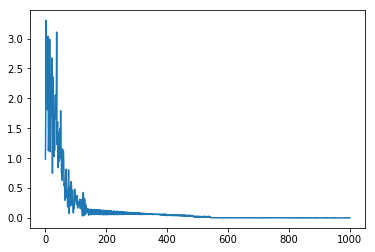

[0.0023965446684378372, 0.004293767938804762, 0.0020961924382441118, 0.00408684555602437, 0.0022886021636218494, 0.003879923173363353, 0.0024909549569883515, 0.004186327466217774, 0.0021806935470965847, 0.00397940508350325]


In [8]:
######Multi-class Clssification without Boosting Feature###########
w1=np.random.randn(x.shape[0]+1,len(np.unique(y)))**2/100  #(number of atrributes+1 , number of classification )
weight_history,cost_history=gradient_descent(multiclass_perceptron,5e-3,1000,w,"raw input")
wo=weight_history[-1]
#print(wo,cost_history[-10:])
result=fusion_rule(x,wo)[0]
probability=fusion_rule(x,wo)[1]
print("training model result is:",result)
misclass=0
for i in range(np.size(y)):
    if result[i] != y[0][i]:
#         print(i,"th calssification doesnot match.","detected class:",result[i],"actual class:",y[0][i])
        misclass=misclass+1
print("number of miscalssification:",misclass)
plt.plot(cost_history)
plt.show()
print(cost_history[-10:])

training model result is: [2 0 1 0 1 1 0 1 1 2 0 1 1 0 0 1 2 0 2 4 0 1 1 0 2 0 4 1 2 2 0 5 0 2 2 0 2
 1 0 1 0 2 2 0 1 2 2 0 0 0 2 0 2 2 4 1 1 0 0 0 2 0 0 1 0 0 1 2 2 2 2 1 1 2
 2 0 0 1 2 1 2 0 0 2 0 1 2 2 2 0 2 2 1 0 2 0 1 0 0 5 2 0 2 0 2 0 0 5 0 1 2
 0 1 1 1 4 1 0 5 0 0 1 5 2 0 2 0 0 1 0 0 0 1 1 1 0 1 0 2 2 2 2 2 0 1 2 1 0
 0 0 0 2 2 1 1 1 2 2 5 5 1 0 0 2 1 1 1 0 0 0 1 0 0 2 2 2 0 0 0 0 1 1 1 2 1
 0 2 0 2 0 0 1 2 1 1 1 0 2 0 2 0 0 0 0 0 0 0 0 2 2 1 5 1 1 1 1 2 2 0 1 1 0
 0 0 0 1 2 1 2 0 2 2 2 2 2 1 5 0 0 0 0 0 0 0 0 2 1 2 1 2 2 2 2 2 2 1 2 2 1
 1 1 2 1 2 0 0 0 0 0 1 1 1 2 1 0 0 2 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 2 2 2 2
 0 0 2 2 2 0 0 0 2 2 2 2 2 0 0 0 0 1 2 0 0 2 2 2 1 0 0 1 1 2 2 0 0 2 2 2 0
 2 2 5 5 1 1 5 1 5 0 0 0 2 2 0 0 0 0 2 1 4 2 2 2 0]
number of miscalssification: 163


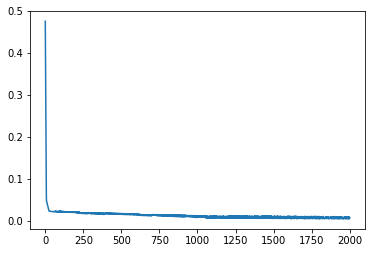

[0.0047613895824895995, 0.004320054581873307, 0.007494940469948108, 0.004852529630309179, 0.004213209674688049, 0.00810617255524354, 0.006409621479136734, 0.004479814339340911, 0.008069131505890982, 0.006419426400396647]


In [15]:
##### with boosting
x_boost=np.array([x[sig1],x[sig2],x[sig3],x[sig4]])

w2=np.random.randn(x_boost.shape[0]+1,len(np.unique(y)))**2/100  #(number of atrributes+1 , number of classification )
weight_history2,cost_history2=gradient_descent(multiclass_perceptron,5e-5,2000,w,'boost')
wo2=weight_history2[-1]
#print(wo,cost_history[-10:])
result2=fusion_rule(x_boost,wo2)[0]
probability2=fusion_rule(x_boost,wo2)[1]
print("training model result is:",result2)
misclass2=0
for i in range(np.size(y)):
    if result2[i] != y[0][i]:
#         print(i,"th calssification doesnot match.","detected class:",result[i],"actual class:",y[0][i])
        misclass2=misclass2+1
print("number of miscalssification:",misclass2)
plt.plot(cost_history2)
plt.show()
print(cost_history2[-10:])

In [22]:
root = Tk()
root.title("Prediction")
root.geometry("600x1050")
v = StringVar()

# test = np.array([[2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26]]).T
diagnose = ["Psoriasis","Seboreic Dermatitis","Lichen Planus","Pityriasis Rosea","Cronic Dermatitis","Pityriasis Rubra Pilaris"]

def withBoost(entries):
    temp1 = []
    for entry in entries:
        field = entry[0]
        val1  = int(entry[1].get())
        temp1.append(np.array([val1]))
    withb=np.reshape(temp1,(34,1))
#     withb=test
    wb_boost=np.array([withb[sig1],withb[sig2],withb[sig3],withb[sig4]])
    r1=fusion_rule(wb_boost,wo2)[0][0]
    p1=fusion_rule(wb_boost,wo2)[1]
    v.set("With boosting, the patient has a probability of %d%% having %s" % (p1*100,diagnose[r1]))

def withoutBoost(entries):
    temp2 = []
    for entry in entries:
        val2 = int(entry[1].get())
        temp2.append(val2)
    withoutb=np.reshape(temp2,(34,1))
    r2=fusion_rule(withoutb,wo)[0][0]
    p2=fusion_rule(withoutb,wo)[1]
    v.set("Without boosting, the patient has a probability of %d%% having %s" % (p2*100,diagnose[r2]))
    
def makeform(root, fields):
    entries = []
    for field in fields[0]:
        row = Frame(root)
        lab = Label(row, width = 50, text=field, anchor='w')
        ent = Entry(row, width = 10)
        row.pack(side=TOP, padx=5, pady=5)
        lab.pack(side=LEFT)
        ent.pack(side=RIGHT)
        entries.append((field, ent))
    v.set("Please enter the data for calculation.")
    return entries

ents = makeform(root, fields)
root.bind('<Return>', (lambda event, e=ents: withBoost(e)))   
b1 = Button(root, text='With Boost',command=(lambda e=ents: withBoost(e)))
b1.pack(padx=5, pady=5)
b2 = Button(root, text='Without Boost', command=(lambda e=ents: withoutBoost(e)))
b2.pack(padx=5, pady=5)
Label(root, textvariable = v).pack()
root.mainloop()